In [1]:
#Importing the required libraries for TSA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import itertools

In [2]:
#to ignore warning messages
import warnings
warnings.filterwarnings("ignore")

In [241]:
#loading the file into Python
df1 = pd.read_csv("C:/MIS/research work/health analytics/Carle_NCSA_11112019/ConvenientCare_NCSA_11112019.csv")
df1.head()

,Date of Visit,Convenient Care Location,Chief Complaint,Diagnosis,ICD9,ICD10,ID
0,04/09/2010,CHAMPAIGN ON CURTIS PBB,*No Chief Complaint,*No Dx,NaN,NaN,1
1,09/17/2010,CHAMPAIGN ON CURTIS,*No Chief Complaint,*No Dx,NaN,NaN,2
2,03/11/2011,DANVILLE FAIRCHILD,ERRONEOUS ENCOUNTER-DISREGARD,ERRONEOUS ENCOUNTER--DISREGARD,10000,10001,3
3,03/31/2011,MATTOON CHARLESTON CLINIC,*No Chief Complaint,*No Dx,NaN,NaN,4
4,06/20/2011,URBANA ON WINDSOR,*No Chief Complaint,"Corneal abrasion, right",918.1,S05.01XA,5


In [242]:
df1 = df1.dropna()

In [243]:
df1['count'] = 1
df1

,Date of Visit,Convenient Care Location,Chief Complaint,Diagnosis,ICD9,ICD10,ID,count
2,03/11/2011,DANVILLE FAIRCHILD,ERRONEOUS ENCOUNTER-DISREGARD,ERRONEOUS ENCOUNTER--DISREGARD,10000,10001,3,1
4,06/20/2011,URBANA ON WINDSOR,*No Chief Complaint,"Corneal abrasion, right",918.1,S05.01XA,5,1
6,08/28/2011,CHAMPAIGN ON CURTIS,*No Chief Complaint,Acute pharyngitis,462,J02.9,7,1
45,08/29/2011,MATTOON CHARLESTON CLINIC,ABDOMINAL PAIN,"Urinary tract infection, site not specified",599.0,N39.0,46,1
46,08/29/2011,MATTOON CHARLESTON CLINIC,ABDOMINAL PAIN,"Iron deficiency anemia, unspecified",280.9,D50.9,47,1
...,...,...,...,...,...,...,...,...
2505658,11/11/2019,CHAMPAIGN ON CURTIS PBB,LEG PAIN,Acute pain of left knee,719.46,M25.562,"945,521",1
2505659,11/11/2019,CHAMPAIGN ON CURTIS PBB,LEG PAIN,Pain of left thigh,729.5,M79.652,"945,521",1
2505660,11/11/2019,MAIN CAMPUS PBB,OTHER,"Acute tonsillitis, unspecified etiology",463,J03.90,"945,522",1
2505661,11/11/2019,MAIN CAMPUS PBB,FLANK PAIN,"Acute tonsillitis, unspecified etiology",463,J03.90,"945,522",1


In [244]:
df1['Date of Visit'].min(), df1['Date of Visit'].max()

('01/01/2012', '12/31/2018')

In [245]:
cols = ['Convenient Care Location', 'Chief Complaint', 'Diagnosis', 'ICD9', 'ICD10', 'ID']
df1.drop(cols, axis=1, inplace=True)
df1 = df1.sort_values('Date of Visit')
df1.isnull().sum()

Date of Visit    0
count            0
dtype: int64

### Grouping patient visits by date and adding their count for time series analysis

In [246]:
df1 = df1.groupby('Date of Visit')['count'].sum().reset_index()

In [247]:
df1 = df1.set_index('Date of Visit')
df1.index

Index(['01/01/2012', '01/01/2013', '01/01/2014', '01/01/2015', '01/01/2016',
       '01/01/2017', '01/01/2018', '01/01/2019', '01/02/2012', '01/02/2013',
       ...
       '12/30/2017', '12/30/2018', '12/31/2011', '12/31/2012', '12/31/2013',
       '12/31/2014', '12/31/2015', '12/31/2016', '12/31/2017', '12/31/2018'],
      dtype='object', name='Date of Visit', length=2994)

In [248]:
df1.index = pd.to_datetime(df1.index)

In [249]:
df1.head()

,count
Date of Visit,
2012-01-01,382
2013-01-01,694
2014-01-01,684
2015-01-01,444
2016-01-01,421


In [250]:
y = df1['count']

In [251]:
y.head()

Date of Visit
2012-01-01    382
2013-01-01    694
2014-01-01    684
2015-01-01    444
2016-01-01    421
Name: count, dtype: int64

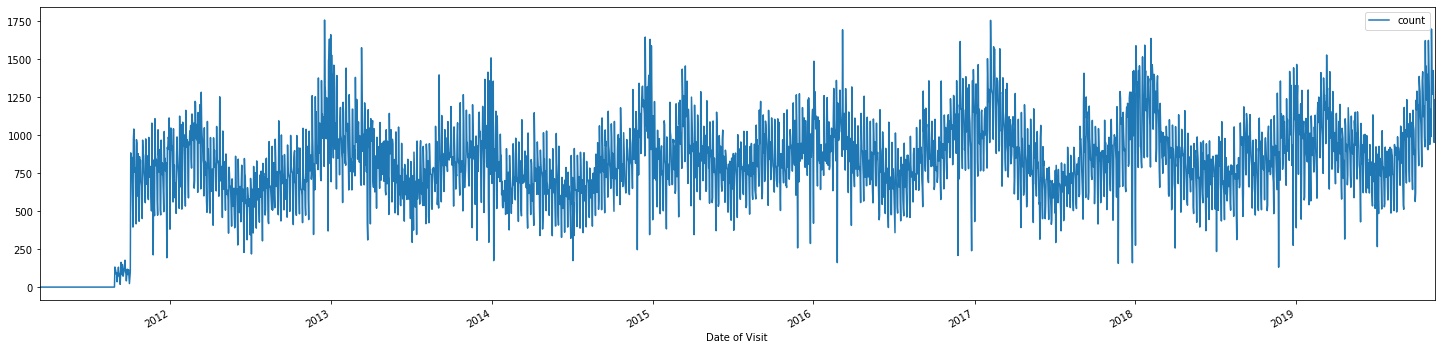

In [252]:
df1.plot(figsize=(25, 6))
plt.show()

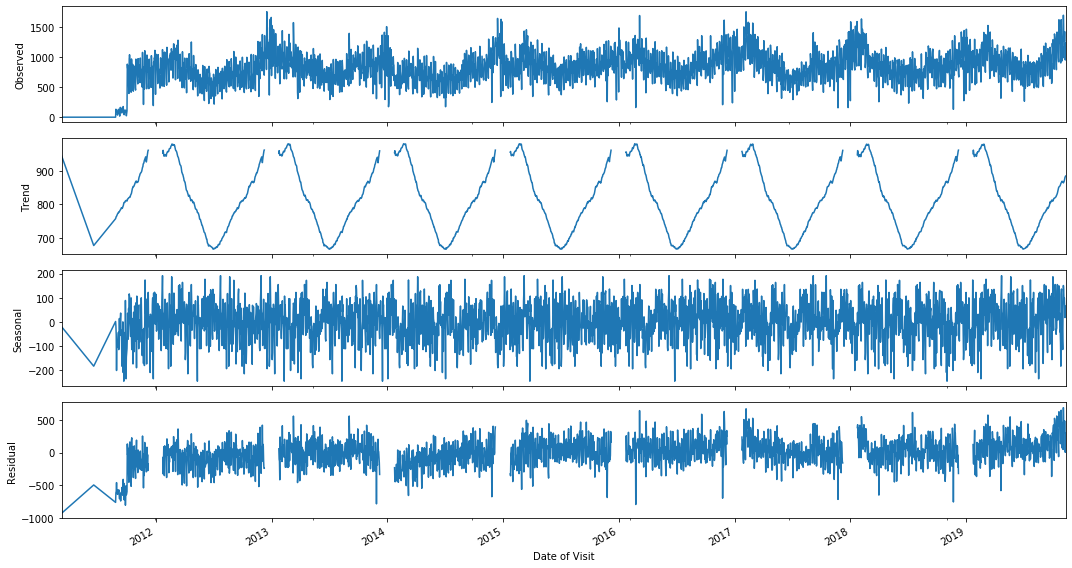

In [256]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive', freq = 365)
fig = decomposition.plot()
plt.show()

In [153]:
y.describe()

count    2994.000000
mean      835.467936
std       254.302748
min         1.000000
25%       674.250000
50%       823.000000
75%       985.000000
max      1758.000000
Name: count, dtype: float64

### To simplify modelling for this stage, I have taken daily average for each month for building this model. We can further investigate daily value for modelling.

In [226]:
y = df1['count'].resample('MS').mean()

In [227]:
y = y.dropna()

In [228]:
y

Date of Visit
2011-03-01       1.000000
2011-06-01       1.000000
2011-08-01      90.000000
2011-09-01      97.120000
2011-10-01     685.900000
                 ...     
2019-07-01     746.000000
2019-08-01     804.516129
2019-09-01     920.166667
2019-10-01    1189.741935
2019-11-01    1256.272727
Name: count, Length: 102, dtype: float64

In [229]:
y = pd.DataFrame({'Date of Visit':y.index, 'Count':y.values})

In [233]:
y

,Month,Date of Visit,Count
0,0,2011-03-01,1.000000
1,1,2011-06-01,1.000000
2,2,2011-08-01,90.000000
3,3,2011-09-01,97.120000
4,4,2011-10-01,685.900000
...,...,...,...
97,97,2019-07-01,746.000000
98,98,2019-08-01,804.516129
99,99,2019-09-01,920.166667
100,100,2019-10-01,1189.741935


In [232]:
y.insert(0, 'Month', range(0, len(y)))
y

ValueError: cannot insert Month, already exists

In [235]:
y.drop('Date of Visit', axis=1, inplace=True)

In [236]:
y

,Month,Count
0,0,1.000000
1,1,1.000000
2,2,90.000000
3,3,97.120000
4,4,685.900000
...,...,...
97,97,746.000000
98,98,804.516129
99,99,920.166667
100,100,1189.741935


In [238]:
#We will create the model using the first 71 rows
#Then we can test the model on the remaining 6 rows later

indata = y.iloc[0:70,:]
outdata = y.iloc[69:,:]

total_timeser = y["Count"]

train = indata.iloc[:,1] 
test = outdata.iloc[:,1]

In [172]:
train

0        1.000000
1        1.000000
2       90.000000
3       97.120000
4      685.900000
         ...     
65    1067.966667
66    1053.161290
67    1046.516129
68    1244.928571
69    1004.064516
Name: Count, Length: 70, dtype: float64

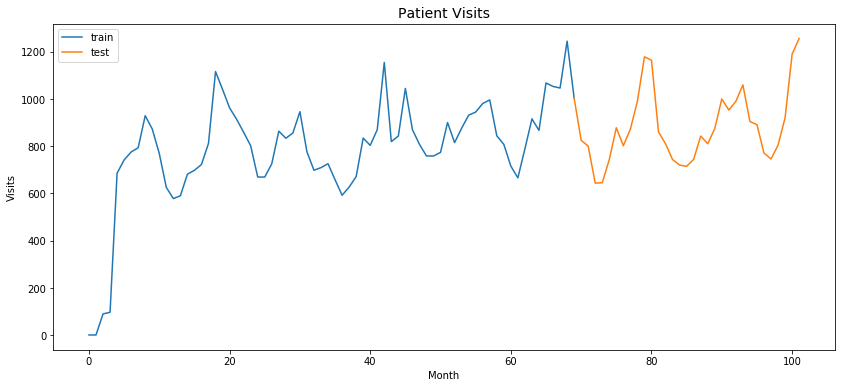

In [239]:
#Plotting the train and test

plt.figure(figsize=(14,6))
plt.plot(train, label = 'train')
plt.plot(test, label = 'test')
plt.xlabel('Month')
plt.ylabel('Visits')
plt.title('Patient Visits', fontsize=14)
plt.legend(loc='best')
plt.show()

In [173]:
#Smoothing the series - Moving Average Smoothing (2 sided)

from astropy.convolution import convolve, Box1DKernel
width = 3
smoothedseries = convolve(np.array(list(train)), kernel=Box1DKernel(width))

In [174]:
smoothedseries

array([6.66666667e-01, 3.06666667e+01, 6.27066667e+01, 2.91006667e+02,
       5.08340000e+02, 7.34568817e+02, 7.70440860e+02, 8.32889136e+02,
       8.65319244e+02, 8.57213867e+02, 7.56023656e+02, 6.57802509e+02,
       5.98144444e+02, 6.16768100e+02, 6.56656989e+02, 7.00775269e+02,
       7.44326882e+02, 8.83659140e+02, 9.89637634e+02, 1.03966859e+03,
       9.72335253e+02, 9.11929877e+02, 8.58411828e+02, 7.76946237e+02,
       7.13674194e+02, 6.88340860e+02, 7.53040860e+02, 8.07847312e+02,
       8.51212186e+02, 8.78687455e+02, 8.59526165e+02, 8.07000768e+02,
       7.28076037e+02, 7.11280696e+02, 6.97871326e+02, 6.58898566e+02,
       6.25887455e+02, 6.30296057e+02, 7.10984946e+02, 7.69898925e+02,
       8.36158423e+02, 9.42883154e+02, 9.48184229e+02, 9.39223118e+02,
       9.02524194e+02, 9.19542473e+02, 9.07878495e+02, 8.12586022e+02,
       7.75255914e+02, 7.63868817e+02, 8.11068817e+02, 8.29961290e+02,
       8.64006810e+02, 8.74400358e+02, 9.17486380e+02, 9.52374119e+02,
      

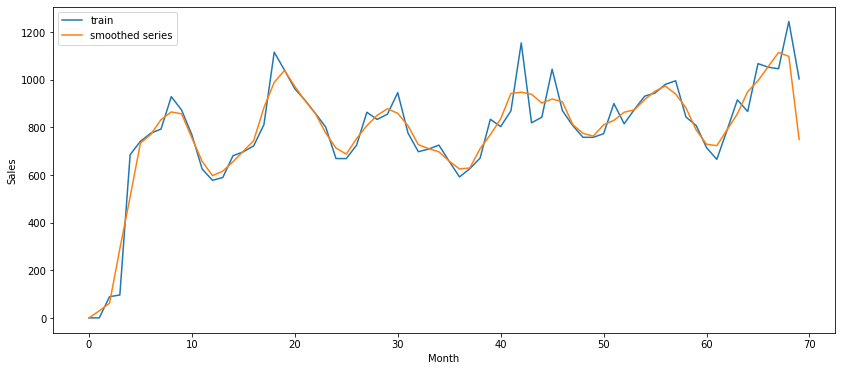

In [175]:
#Plot the smoothed time series

plt.figure(figsize = (14,6))
plt.plot(train, label = 'train')
plt.plot(smoothedseries, label = 'smoothed series')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(loc = 'best')
plt.show()

## Auto ARIMA Method

Creating p,d,q and seasonal p,d,q values. Generating their combinations

In [176]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)


### Running the ARIMAX function and generating AIC and BIC values

In [177]:
#iteration over all the combinations of (p,d,q)

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{} - BIC:{}'.format(param, param_seasonal, round(results.aic,4), round(results.bic,4)))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1124.4076 - BIC:1126.6417
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:886.7751 - BIC:890.8612
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:763.5652 - BIC:765.6082
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:571.6365 - BIC:575.2498
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:784.8077 - BIC:788.9285
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:761.2907 - BIC:767.4199
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:584.4358 - BIC:588.093
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:569.6071 - BIC:575.0271
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1028.1254 - BIC:1032.5645
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:807.5433 - BIC:813.6194
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:710.0737 - BIC:714.1244
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:542.0447 - BIC:547.3973
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:751.2308 - BIC:757.4121
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:712.7189 - BIC:720.8203
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:566.4366 - BIC:571.9226
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:542.9636 - BIC:550.1004
ARIMA(0, 1, 0)x(0, 0,

#### Checking for lowest AIC and BIC values for our model
The output of our code suggests that ARIMA(0, 1, 1)x(0, 1, 1, 12)12 yields the lowest AIC:531.0436 - BIC:536.3272 values. We should therefore consider this to be optimal option out of all the models we have considered.

In [178]:
#Fitting the ARIMA model on the train series

arima_model_train = sm.tsa.statespace.SARIMAX(train,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_arima_train = arima_model_train.fit()

print(results_arima_train.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3713      0.113     -3.298      0.001      -0.592      -0.151
ma.S.L12      -0.1888      0.118     -1.600      0.110      -0.420       0.042
sigma2      1.176e+04   2843.954      4.134      0.000    6182.774    1.73e+04


Here, we can see that the model is not a good fit. If we check the standard error values obtained from the model, they are comparable to the coefficient values. Hence, the ARIMA model obtained should not be a good fit.

In [180]:
#Predicted values based on ARIMA model

pred_arima_train = results_arima_train.get_prediction(dynamic=False)
pred_arima_train_ci = pred_arima_train.conf_int()

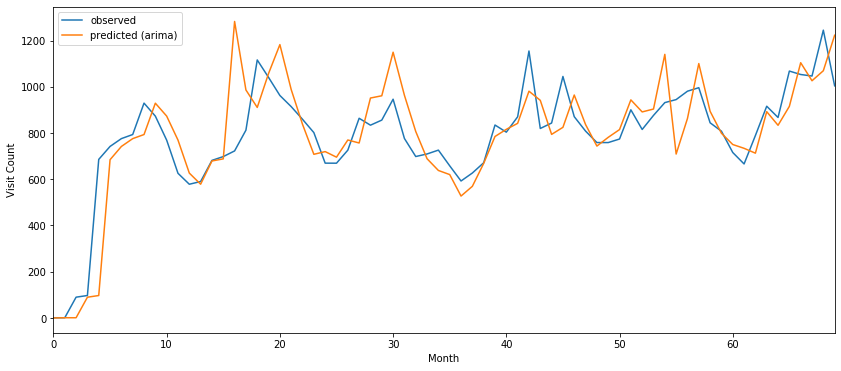

In [181]:
#Plotting the predicted and actual data together

plt.figure(figsize = (14,6))

plot1 = train.plot(label='observed')
pred_arima_train.predicted_mean.plot(ax=plot1, label='predicted (arima)')

plt.xlabel('Month')
plt.ylabel('Visit Count')
plt.legend(loc = 'best')
plt.show()

### Stationarity Tests

In [184]:
#Now let's check if the residual series is white noise
# 1. Augmented Dicky Fuller (ADF) test

import statsmodels.tsa.stattools as ts

residual = pred_arima_train.predicted_mean - train

#removing the null values from the residual series
residual1 = residual[~residual.isnull()]
adf_test = ts.adfuller(residual1, autolag='AIC')

print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.992315
p-value: 0.000000
Critical Values:
	1%: -3.530
	5%: -2.905
	10%: -2.590


The p-value obtained using the ADF Test is .... than 0.05.

In [186]:
# 2. KPSS test

kpss_test = ts.kpss(residual1, regression='c', store=False)
print('KPSS Statistic: %f' % kpss_test[0])
print('p-value: %f' % kpss_test[1])
print('Critical Values:')
for key, value in kpss_test[3].items():
	print('\t%s: %.3f' % (key, value))

KPSS Statistic: 0.093561
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


In [187]:
#Fitting the ARIMA model on the train series

arima_model = sm.tsa.statespace.SARIMAX(total_timeser,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_arima = arima_model.fit()

print(results_arima.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3405      0.109     -3.111      0.002      -0.555      -0.126
ma.S.L12      -0.5487      0.088     -6.271      0.000      -0.720      -0.377
sigma2      1.174e+04   1724.737      6.807      0.000    8359.288    1.51e+04


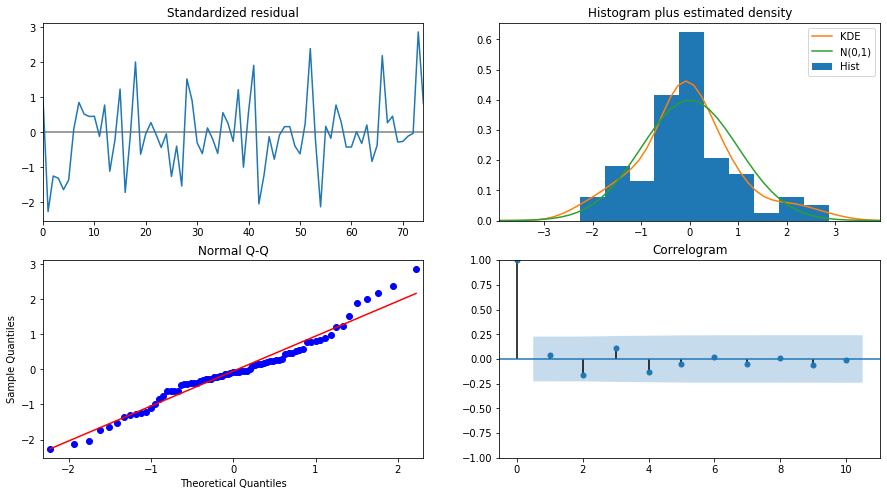

In [188]:
#Model diagnostics

results_arima.plot_diagnostics(figsize=(15, 8))
plt.show()

In the top right plot, we can see that the red line follows the green line which is the normal distribution with mean 0 and standard deviation of 1 but not in a close fashion. Similar is the case with the qq-plot. On the bottom left, it can be improved to fit the linear line better.

If we see the top left graph, we cannot find any distinguished pattern for seasonality. It appears as white noise and since, the ACF plot has all the values under the confidence interval, it can be established that the values do not have any relationship with the past values.

Those observations lead us to conclude that our model produces a satisfactory fit that could help us understand our time series data and forecast future values. However, one can always find some scope of improvement in the model obtained.


In [189]:
#Predicted values based on ARIMA model

pred_arima = results_arima.get_prediction(dynamic=False)
pred_arima_ci = pred_arima.conf_int()

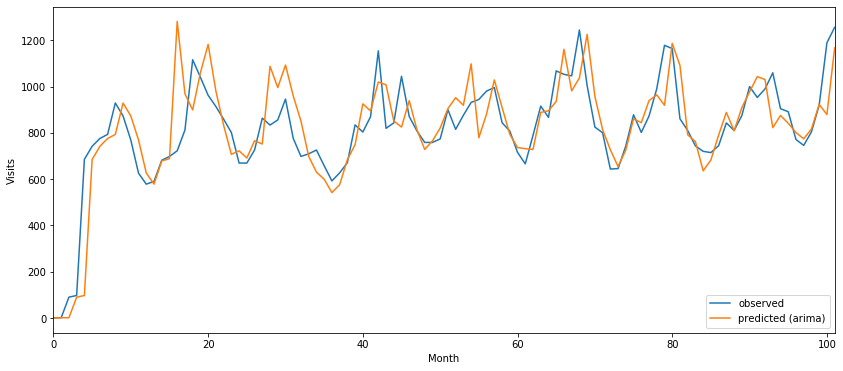

In [205]:
#Plotting the predicted and actual data together

plt.figure(figsize = (14,6))

plot1 = total_timeser.plot(label='observed')
pred_arima.predicted_mean.plot(ax=plot1, label='predicted (arima)')

plt.xlabel('Month')
plt.ylabel('Visits')
plt.legend(loc = 'best')
plt.show()

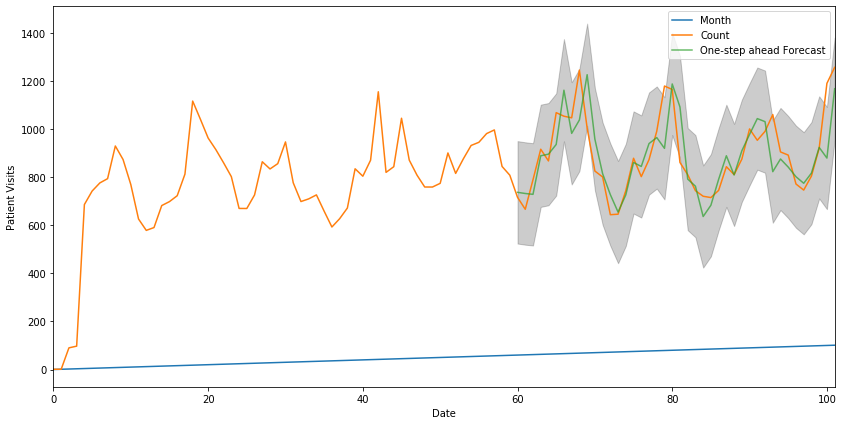

In [196]:
pred = results_arima.get_prediction(start=60, dynamic=False)
pred_ci = pred.conf_int()
ax = y[0:].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Patient Visits')
plt.legend()
plt.show()

### Model Evaluation - MAPE

Now, let's compare our prediction with the actual values using MAPE. The lesser the Mean absolute percentage error, better the model is.

In [191]:
#Calculating MAPE for Auto ARIMA Method

arima_pred_test = pred_arima.predicted_mean[70:]
n = len(arima_pred_test)
total = 0
for i in range(n):
    total = total + np.absolute((100*(test.iloc[i] - arima_pred_test.iloc[i])/test.iloc[i]))

MAPE = total/n
print("MAPE Value: {}".format(round(MAPE,4)))

MAPE Value: 7.1619


The MAPE value comes out to be 24.12 which signifies that it is a good fit for the series.

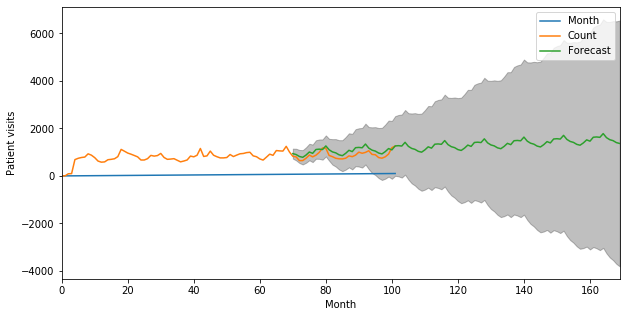

In [202]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(10, 5))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Month')
ax.set_ylabel('Patient visits')
plt.legend()
plt.show()

In [204]:
pred_uc.predicted_mean[103]

1257.7018835958652

### Further analysis can be done using ARIMAX model where we can use additional parameters like weather for building our forecasting model